# **Uncleaned Laptop Price Dataset**

Hello 👋, and a very good morning or evening — whenever you come across this documentation!
This guide focuses on data cleaning, one of the most critical steps in any data analysis or machine learning workflow. Whether you're working with raw datasets or preparing data for visualization, this documentation will walk you through essential techniques and best practices to ensure your data is clean, consistent, and ready for use.

Every beginning requires the right tools — just like we can't build a house 🏠 without them, we can't clean data without the right libraries. So, before we start transforming messy data into meaningful insights, let's import the essential tools to ensure we build on a solid foundation without risking any damage to our work.

In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('Data/uncleaned_laptops_price_data/laptopData.csv')

🏠 Before building a house, you must first examine the land 🏞️ and understand its components — only then can you plan the construction process.
🧠 Similarly, in data analysis, it's essential to first explore the dataset 📊 and understand the available columns 🧾 before beginning any data cleaning or transformation 🧹.

In [748]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


### **🛠️ Data Pre-processing Plan**
Before moving forward with analysis or modeling, it's essential to prepare and clean the data properly. The following steps outline the pre-processing workflow we will follow:

1. **🧐 Explore the Data Structure**
First, we inspect the dataset to understand its structure, column types, and overall shape. We’ll use summary statistics and basic visualizations to detect patterns, distributions, and potential issues. This helps us form clear observations and guide our cleaning process.

2. **🩹 Handle Missing Values**
Next, we identify any missing values in the dataset and decide how to deal with them. Depending on the context, we may choose to drop, fill, or impute missing values using appropriate methods such as mean, median, mode, or forward/backward fill.

3. **🔄 Fix Inconsistent Data Types**
We ensure that all columns have the correct data types. This includes converting strings to datetime, changing object columns to numeric, or categorizing textual data. This step is crucial for correct analysis and visualization.

4. **♻️ Remove Duplicate Records**
Finally, we check for and remove duplicate rows to ensure data integrity. Duplicate entries can distort analysis and lead to misleading insights.


☕ Now that we know the plan, grab your coffee or tea — let’s dive into cleaning the data step by step!

#### **Step 1: 🧐 Explore the Data Structure**

We begin the exploration phase by using **.head()** and **.tail()** to quickly view the first and last few rows of the dataset. This gives us an initial sense of the structure and helps us catch early issues like missing values, inconsistent entries, or formatting problems that may not appear at the top alone.

In [749]:
df.head(50)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [750]:
df.tail(39)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1264,1264.0,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1265,1265.0,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1266,1266.0,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1267,1267.0,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1268,1268.0,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1269,1269.0,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,1270.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,1271.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,1272.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1273,1273.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


Although we've displayed the full DataFrame, it's not possible to visually detect all missing values, duplicates, or inconsistent data types just by looking at it. That’s where the power of pandas and other tools comes in — they help us uncover issues that aren’t visible to the eye, allowing us to clean the data more effectively and improve the accuracy of our analysis.

#### 1.2. **Check Dataset Dimensions and Structure**

To confidently begin working with our data, we first need to confirm that it was loaded correctly and understand its overall structure — including the number of rows, columns, and the names of those columns. For this, we use methods like **df.shape**, **df.columns**, **df.index**, and **d.info()** which give us a quick structural overview of the dataset.

In [751]:
df.shape

(1303, 12)

In this step, I checked the number of rows and columns in the project, and it matches the one from the source (Kaggle) in our scenario. Are they all here?
Hmmm🤔, the answer is **yes!!!**, lets celebrate 🎂🎉.

As we get both the number of columns and rows, now is the step to know what their types are so we can deal with them later on, and this step will avoid the mistakes when we want to use the methods functions for each culomn and row.

Let's get the info to know the columns and their names:

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


### <font color="red"><b>Here the observation that I came with🧐:</font></b><br>
1. The column **'Unnamed: 0'**:<br>
It contains the ':' sign, and '0', so this will lead to problems later, as well as the column is unnamed.

2. For the best practice lets lowercase all the columns names

In [753]:
df.rename(columns={'Unnamed: 0': 'orders'}, inplace=True)
df.columns =df.columns.str.lower()

Now, after knowing what the column names are and the range of the rows, we are left with the deal with what is inside the table (Values)
At this point, we must select only the **Object** column type to prevent errors from occurring.

### Consider making a new copy from the original dataframe; this step will be useful if you want to get back to the original dataframe.

In [754]:
df_v2 = df.copy()

In [755]:
# Let's remove the extra spaces in the dataframe values if available, just to make sure that we are doing good.
object_cols = df_v2.select_dtypes(include = 'object').columns
for ob_cols in object_cols:
    df_v2[ob_cols] = df_v2[ob_cols].str.replace(r'\s+', ' ', regex=True).str.strip()

In [756]:
df_v2.describe()

,orders,price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


### Here the **Explore the Data Structure** is done and time to say goodbey and welcome to step 2 in data preprocessing.

#### **Step 2: 🩹 Handle Missing Values**

Next, we identify any missing values in the dataset and decide how to deal with them. Depending on the context, we may choose to drop, fill, or impute missing values using appropriate methods such as mean, median, mode, or forward/backward fill.

To know the null we have to use the **df.isnull().sum()**

In [757]:
df_v2.isnull().sum()

orders              30
company             30
typename            30
inches              30
screenresolution    30
cpu                 30
ram                 30
memory              30
gpu                 30
opsys               30
weight              30
price               30
dtype: int64

We see that we have 30 missed values in all columns, so let's deal with them:

##### Let's fill the value in Column (day):

So, the better way to deal with the missed values is to define the rows which no values as a whole (rows with no a single value):

In [758]:
df_v2.dropna(how = 'all', inplace = True)

In [759]:
df_v2.isnull().sum()

orders              0
company             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price               0
dtype: int64

Now we made sure that we do not have null values and we are doing perfectly.

In [760]:
df_v2.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302],
      dtype='int64', length=1273)

### <font color="red"><b>Here the observation that I came with🧐:</font></b><br>
1. The 'sr' column it's not continuous as in step 1, like in points (18, 19, 21) between 19 and 21, which is 20. So let's fill it in to be go 1 by 1. 

**Let's fix it 🛠️:**


In [761]:
df_v2.iloc[:, 0] = np.arange(1, len(df_v2) + 1)
df_v2['orders'] = df_v2['orders'].astype('int')

Now, lets define the range of rows in the dataframe by using **df.index**

In [762]:
df_v2.head(467)

,orders,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
473,463,Dell,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.42kg,98133.7680
474,464,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,12GB,128GB SSD + 1TB HDD,Intel HD Graphics 530,Windows 10,2.06kg,69210.7200
475,465,Dell,Notebook,14,1366x768,Intel Core i3 6100U 2.3GHz,8GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.79kg,39427.2000
476,466,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.2400


This tells us the data frame we have contains 1303 (Correct from df.shape), and its starts counting from 0 and increased by 1 step each time.

#### Let's check the unique value for each column to see if there is any values are the same.

In [763]:
df_v2['company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [764]:
df_v2['typename'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [765]:
df_v2['inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

Hmmmmm🤔, we catched the '?' sign so lets solve it by using filter

In [766]:
# As i searched i relized that if its workstation, and the company is Dell and the weigt is 1.78kg it means that the inches is 15.6

df_v2.loc[(df_v2['company'] == 'Dell') & (df_v2['typename'] == 'Workstation') & (df_v2['weight'] == '1.78kg'),'inches'] = '15.6'
df_v2['inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '31.6', '17', '15', '14.1', '11.3', '10.1'], dtype=object)

In [767]:
df_v2['screenresolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [768]:
df_v2['cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [769]:
df_v2['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [770]:
df_v2['memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD + 1TB HDD', '256GB SSD + 256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD + 1TB HDD',
       '256GB SSD + 2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD + 1TB HDD', '1TB SSD',
       '256GB SSD + 500GB HDD', '128GB SSD + 2TB HDD',
       '512GB SSD + 512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD + 256GB SSD', '512GB SSD + 2TB HDD',
       '64GB Flash Storage + 1TB HDD', '180GB SSD', '1TB HDD + 1TB HDD',
       '32GB HDD', '1TB SSD + 1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD + 1.0TB Hybrid', '256GB SSD + 1.0TB Hybrid'],
      dtype=object)

In [771]:
df_v2[df_v2['memory'] == '?']
df_v2.drop(770, inplace = True)

In [772]:
df_v2['gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeForce 920M', 'AMD Radeon R7

In [773]:
df_v2['opsys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [774]:
df_v2['opsys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [775]:
df_v2['weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

Here as well we have "?" sign, let's drop it 😈

In [776]:
df_v2[df_v2['weight'] == '?']

,orders,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
208,202,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [777]:
df_v2.drop(208, inplace = True)

In [778]:
df_v2[df_v2['weight'] == '?']

,orders,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price


In [779]:
df_v2['price'].unique()

array([ 71378.6832,  47895.5232,  30636.    , 135195.336 ,  96095.808 ,
        21312.    , 114017.6016,  61735.536 ,  79653.6   ,  41025.6   ,
        20986.992 ,  18381.0672, 130001.6016,  26581.392 ,  67260.672 ,
        80908.344 ,  39693.6   , 152274.24  ,  26586.72  ,  52161.12  ,
        53226.72  ,  13746.24  ,  43636.32  ,  35111.52  ,  22305.1392,
        58554.72  ,  42624.    ,  69157.44  ,  47738.88  ,  13053.0672,
        10602.72  ,  23389.92  ,  99580.32  ,  53173.44  ,  13266.72  ,
        19553.76  ,  26037.4032,  46833.12  ,  20725.92  ,  79866.72  ,
        27864.9072,  36336.96  ,  75604.32  ,  69210.72  ,  34045.92  ,
        24828.48  ,  44808.48  ,  21231.5472,  58767.84  ,  20459.52  ,
        40908.384 ,  31232.2032, 130482.72  ,  22111.2   ,  31914.72  ,
        50136.48  ,  36763.2   , 105654.24  ,  23373.4032,  12201.12  ,
        29250.72  ,  50562.72  ,  58021.92  ,  50882.4   ,  46353.6   ,
        58341.6   ,  27652.32  ,  45554.4   ,  28238.4   ,  5205

Let's drop the first column.

In [780]:
df_v2.drop('orders', axis=1, inplace=True)

In [781]:
df_v2[['weight_value', 'weight_unit']] = df_v2['weight'].str.extract(r'([0-9.]+)([a-zA-Z]+)')
df_v2['weight_value'] = df_v2['weight_value'].astype(float)

In [782]:
df_v2.drop('weight', axis=1)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,price,weight_value,weight_unit
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,1.37,kg
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,1.34,kg
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,1.86,kg
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,1.83,kg
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,1.37,kg
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,33992.6400,1.80,kg
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,79866.7200,1.30,kg
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,12201.1200,1.50,kg
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,40705.9200,2.19,kg


Let's see the duplicates if available

In [783]:
df_v2[df_v2.duplicated(keep=False)]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,weight_value,weight_unit
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200,2.20,kg
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200,1.20,kg
1262,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200,2.30,kg
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200,2.40,kg
1264,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200,2.20,kg
1265,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200,2.60,kg
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672,2.04,kg
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472,2.30,kg
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200,1.17,kg
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,2.20,kg


In [784]:
df_v2 = df_v2.drop_duplicates(keep='last')
df_v2

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,weight_value,weight_unit
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1.37,kg
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.34,kg
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1.86,kg
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1.83,kg
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1.37,kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1.80,kg
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1.30,kg
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1.50,kg
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,2.19,kg


In [785]:
df_v2.to_excel("df_output.xlsx", index=False)

Let's now come out with some feature from available feature:

The first feature is "screenresolution", we are going to get:
1. Touchscreen (yes/no)
2. Reselutions (1366x768, 1440x900, 1600x900, 1920x1080, 1920x1200, 2160x1440, 2256x1504, 2304x1440, 2400x1600, 2560x1440, 2560x1600, 2736x1824, 2880x1800, 3200x1800, 3840x2160)
3. Screen Type

Creating a new column for reselution:

In [786]:
df_v3 = df_v2.copy()

In [787]:
df_v3['resolution'] = df_v3['screenresolution'].str.extract(r'(\d{3,4}x\d{3,4})')

In [788]:
df_v3['resolution'].isnull().sum()

np.int64(0)

Creating a new column for touchscreen:

In [789]:
df_v3['touchscreen'] = df_v3['screenresolution'].str.contains('touchscreen', case=False, na=False).map({True: 'Yes', False: 'No'})

In [790]:
df_v3['touchscreen'].isnull().sum()

np.int64(0)

Creating a new column for screen type:

In [791]:
df_v3

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,weight_value,weight_unit,resolution,touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1.37,kg,2560x1600,No
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.34,kg,1440x900,No
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1.86,kg,1920x1080,No
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1.83,kg,2880x1800,No
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1.37,kg,2560x1600,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1.80,kg,1920x1080,Yes
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1.30,kg,3200x1800,Yes
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1.50,kg,1366x768,No
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,2.19,kg,1366x768,No


In [792]:
df_v3['cpu_brand'] = df_v3['cpu'].str.extract(r'^(Intel|AMD|Apple|Samsung Cortex)', expand=False)

In [793]:
df_v3['cpu_series'] = df_v3['cpu'].str.extract(r'(Core i[3579]|Ryzen [3579]|Ryzen|Celeron|Pentium|\b[3579]\b)', expand=False
)
df_v3['cpu_series'] = df_v3['cpu_series'].fillna('Unknown')

In [794]:
unknown_ratio = (df_v3['cpu_series'] == 'Unknown').mean()
print(f"Unknown ratio: {unknown_ratio:.2%}")

Unknown ratio: 6.68%


As for the best practice if the 'Unknown' value is less than 20% better to drop them

In [795]:
df_v4 = df_v3.copy()

In [796]:
df_v4 = df_v4[~df_v4['cpu_series'].str.contains('Unknown', case=False, na=False)]

In [797]:
df_v4['cpu_speed_ghz'] = df_v4['cpu'].str.extract(r'([\d.]+)GHz', expand=False).astype(float)

In [798]:
df_v4

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,weight_value,weight_unit,resolution,touchscreen,cpu_brand,cpu_series,cpu_speed_ghz
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1.37,kg,2560x1600,No,Intel,Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.34,kg,1440x900,No,Intel,Core i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1.86,kg,1920x1080,No,Intel,Core i5,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1.83,kg,2880x1800,No,Intel,Core i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1.37,kg,2560x1600,No,Intel,Core i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1.80,kg,1920x1080,Yes,Intel,Core i7,2.5
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1.30,kg,3200x1800,Yes,Intel,Core i7,2.5
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1.50,kg,1366x768,No,Intel,Celeron,1.6
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,2.19,kg,1366x768,No,Intel,Core i7,2.5


In [799]:
df_v4['cpu_speed_ghz'].isnull().sum()

np.int64(0)

In [800]:
df_v4['cpu_series'] = df_v4['cpu_series'].replace('3', 'Core i3')

In [801]:
df_v4.drop(['cpu','weight'], axis = 1, inplace = True)

In [802]:
df_v4['ram_value'] = df_v4['ram'].str.extract(r'(\d+)', expand=False).astype(int)

In [803]:
df_v4['ram_unit'] = df_v4['ram'].str.extract(r'([A-Za-z]+)', expand=False)

In [804]:
df_v4.drop('ram', axis = 1, inplace = True)

In [805]:
df_v4['memory_value'] = df_v4['memory'].str.extract(r'(\d+)', expand=False).astype(int)
df_v4['memory_type'] = df_v4['memory'].str.extract(r'[A-Za-z]+\s?(SSD|HDD|Flash Storage)', expand=False)

In [806]:
df_v4

,company,typename,inches,screenresolution,memory,gpu,opsys,price,weight_value,weight_unit,resolution,touchscreen,cpu_brand,cpu_series,cpu_speed_ghz,ram_value,ram_unit,memory_value,memory_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,1.37,kg,2560x1600,No,Intel,Core i5,2.3,8,GB,128,SSD
1,Apple,Ultrabook,13.3,1440x900,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,1.34,kg,1440x900,No,Intel,Core i5,1.8,8,GB,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,1.86,kg,1920x1080,No,Intel,Core i5,2.5,8,GB,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,1.83,kg,2880x1800,No,Intel,Core i7,2.7,16,GB,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,1.37,kg,2560x1600,No,Intel,Core i5,3.1,8,GB,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,128GB SSD,Intel HD Graphics 520,Windows 10,33992.6400,1.80,kg,1920x1080,Yes,Intel,Core i7,2.5,4,GB,128,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,512GB SSD,Intel HD Graphics 520,Windows 10,79866.7200,1.30,kg,3200x1800,Yes,Intel,Core i7,2.5,16,GB,512,SSD
1300,Lenovo,Notebook,14,1366x768,64GB Flash Storage,Intel HD Graphics,Windows 10,12201.1200,1.50,kg,1366x768,No,Intel,Celeron,1.6,2,GB,64,Flash Storage
1301,HP,Notebook,15.6,1366x768,1TB HDD,AMD Radeon R5 M330,Windows 10,40705.9200,2.19,kg,1366x768,No,Intel,Core i7,2.5,6,GB,1,HDD


In [807]:
df_v4[['memory_value','memory_type']].isnull().sum()

memory_value    0
memory_type     7
dtype: int64

In [808]:
df_v4 = df_v4[df_v4['memory_type'].notna()]

In [809]:
df_v4.drop('memory', axis = 1)

,company,typename,inches,screenresolution,gpu,opsys,price,weight_value,weight_unit,resolution,touchscreen,cpu_brand,cpu_series,cpu_speed_ghz,ram_value,ram_unit,memory_value,memory_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 640,macOS,71378.6832,1.37,kg,2560x1600,No,Intel,Core i5,2.3,8,GB,128,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel HD Graphics 6000,macOS,47895.5232,1.34,kg,1440x900,No,Intel,Core i5,1.8,8,GB,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,Intel HD Graphics 620,No OS,30636.0000,1.86,kg,1920x1080,No,Intel,Core i5,2.5,8,GB,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,AMD Radeon Pro 455,macOS,135195.3360,1.83,kg,2880x1800,No,Intel,Core i7,2.7,16,GB,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Iris Plus Graphics 650,macOS,96095.8080,1.37,kg,2560x1600,No,Intel,Core i5,3.1,8,GB,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel HD Graphics 520,Windows 10,33992.6400,1.80,kg,1920x1080,Yes,Intel,Core i7,2.5,4,GB,128,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel HD Graphics 520,Windows 10,79866.7200,1.30,kg,3200x1800,Yes,Intel,Core i7,2.5,16,GB,512,SSD
1300,Lenovo,Notebook,14,1366x768,Intel HD Graphics,Windows 10,12201.1200,1.50,kg,1366x768,No,Intel,Celeron,1.6,2,GB,64,Flash Storage
1301,HP,Notebook,15.6,1366x768,AMD Radeon R5 M330,Windows 10,40705.9200,2.19,kg,1366x768,No,Intel,Core i7,2.5,6,GB,1,HDD


In [810]:
df_v4.to_excel('Final.xlsx', index = True)

In [811]:
df_v4 = df_v4.astype({
    'company' : 'object',
    'typename' : 'object',
    'inches' : 'float',
    'screenresolution' : 'object',
    'gpu' : 'object',
    'opsys' : 'object',
    'price' : 'float',
    'weight_value' : 'float',
    'weight_unit' : 'object',
    'resolution' : 'object',
    'touchscreen' : 'bool',
    'cpu_brand' : 'object',
    'cpu_series' : 'object',
    'cpu_speed_ghz' : 'float',
    'ram_value' : 'int',
    'ram_unit' : 'object',
    'memory_value' : 'int',
    'memory_type' : 'object'
})

In [812]:
df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1152 non-null   object 
 1   typename          1152 non-null   object 
 2   inches            1152 non-null   float64
 3   screenresolution  1152 non-null   object 
 4   memory            1152 non-null   object 
 5   gpu               1152 non-null   object 
 6   opsys             1152 non-null   object 
 7   price             1152 non-null   float64
 8   weight_value      1152 non-null   float64
 9   weight_unit       1152 non-null   object 
 10  resolution        1152 non-null   object 
 11  touchscreen       1152 non-null   bool   
 12  cpu_brand         1152 non-null   object 
 13  cpu_series        1152 non-null   object 
 14  cpu_speed_ghz     1152 non-null   float64
 15  ram_value         1152 non-null   int64  
 16  ram_unit          1152 non-null   object 
 17  

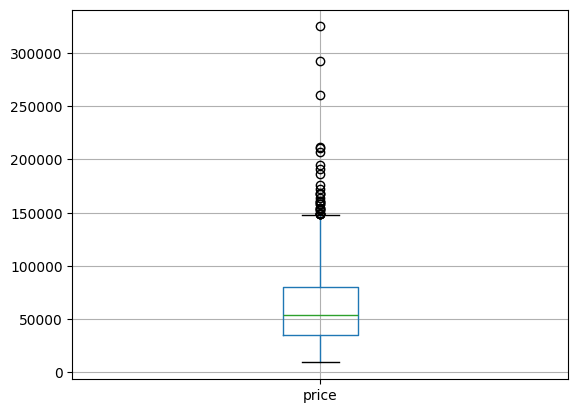

In [813]:
df_v4.boxplot('price')
plt.show()

In [814]:
q1 = df_v4['price'].quantile(0.25)
q3= df_v4['price'].quantile(0.75)
iqr = q3 - q1
print ("IQR is: ", iqr)
df_v5 = df_v4[(df_v4['price'] >= q1 - 1.5 * iqr) & (df_v4['price'] <= q3 + 1.5 * iqr)]

IQR is:  45594.35999999999


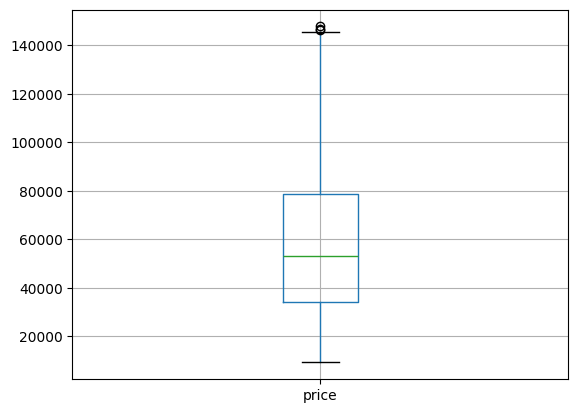

In [815]:
df_v5.boxplot(column='price')
plt.show()

In [816]:
df_v5.shape


(1121, 19)

In [819]:
en = LabelEncoder()

In [820]:
for col in df_v5.select_dtypes(include = ['object']).columns:
     df_v5[col] = en.fit_transform(df_v5[col])

C:\Users\MOBPC\AppData\Local\Temp\ipykernel_17076\2754994542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v5[col] = en.fit_transform(df_v5[col])
C:\Users\MOBPC\AppData\Local\Temp\ipykernel_17076\2754994542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v5[col] = en.fit_transform(df_v5[col])
C:\Users\MOBPC\AppData\Local\Temp\ipykernel_17076\2754994542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [821]:
# Define features (X) and target (y) from the DataFrame
X = df_v5.drop('price', axis=1)
y = df_v5['price']

In [822]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [823]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [824]:
# Make predictions
y_pred = model.predict(X_test)

In [825]:
# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [826]:
print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 284850296.40
R-squared (R2): 0.70


In [827]:
df_v5

,company,typename,inches,screenresolution,memory,gpu,opsys,price,weight_value,weight_unit,resolution,touchscreen,cpu_brand,cpu_series,cpu_speed_ghz,ram_value,ram_unit,memory_value,memory_type
0,1,4,13.3,22,3,39,7,71378.6832,1.37,0,9,True,1,2,2.3,8,0,128,2
1,1,4,13.3,1,1,33,7,47895.5232,1.34,0,1,True,1,2,1.8,8,0,128,0
2,7,3,15.6,8,13,35,3,30636.0000,1.86,0,3,True,1,2,2.5,8,0,256,2
3,1,4,15.4,24,23,6,7,135195.3360,1.83,0,11,True,1,3,2.7,16,0,512,2
4,1,4,13.3,22,13,40,7,96095.8080,1.37,0,9,True,1,2,3.1,8,0,256,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,13,3,30,4,33992.6400,1.80,0,3,True,1,3,2.5,4,0,128,2
1299,10,0,13.3,18,23,30,4,79866.7200,1.30,0,12,True,1,3,2.5,16,0,512,2
1300,10,3,14.0,0,28,23,4,12201.1200,1.50,0,0,True,1,0,1.6,2,0,64,0
1301,7,3,15.6,0,9,10,4,40705.9200,2.19,0,0,True,1,3,2.5,6,0,1,1
